In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import trange

from lds.generative_model import lds_generative
from lds.filtering import lds_filtering
from lds.utils import stimulus_std_schedule

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
num_timesteps = 10000

transition_std = 0.5
init_std = 1.0
obs_std = 1.0

num_seeds = 250

num_stimulus_std = 20
init_stimulus_std = 0.05

stimulus_std = stimulus_std_schedule(num_stimulus_std, init_stimulus_std)

x_mean = np.array([1., 1.])

max_on_diagonal = np.zeros((num_seeds, num_stimulus_std))
max_off_diagonal = np.zeros((num_seeds, num_stimulus_std))

with trange(num_seeds, dynamic_ncols=True) as pbar:
    for i in pbar:
        for k in range(num_stimulus_std):
            x_cov = np.eye(2) * (stimulus_std[k] ** 2)
            x = np.random.multivariate_normal(x_mean, x_cov, size=(num_timesteps, ))

            w, r = lds_generative(transition_std=transition_std, obs_std=obs_std, init_std=init_std, stimuli=x)
            mu, Sigma = lds_filtering(r, x, init_std=init_std, obs_std=obs_std, transition_std=transition_std)
        
            Q = np.matmul(x[:, :, None], x[:, None, :]).mean(0)
            Sigma = Sigma[1:].mean(0)
            
            Gamma = np.matmul(Sigma, np.matmul(Q, Sigma))
            
            max_on_diagonal[i, k] = max(np.abs(np.array([Gamma[0, 0], Gamma[1, 1]])))
            max_off_diagonal[i, k] = max(np.abs(np.array([Gamma[0, 1], Gamma[1, 0]])))

  0%|          | 0/250 [00:00<?, ?it/s]

100%|██████████| 250/250 [12:12<00:00,  2.93s/it]


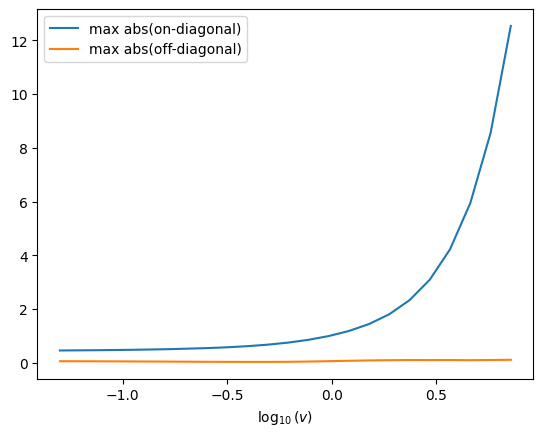

In [14]:
plt.plot(np.log10(stimulus_std), max_on_diagonal.mean(0), label="max abs(on-diagonal)")
plt.plot(np.log10(stimulus_std), max_off_diagonal.mean(0), label="max abs(off-diagonal)")
plt.xlabel(r"$\log_{10}(v)$")
plt.legend()

In [15]:
# what about the final (asymptotic) Sigma?
num_timesteps = 10000

transition_std = 0.5
init_std = 1.0
obs_std = 1.0

num_seeds = 250

num_stimulus_std = 20
init_stimulus_std = 0.05

stimulus_std = stimulus_std_schedule(num_stimulus_std, init_stimulus_std)

x_mean = np.array([1., 1.])

max_on_diagonal = np.zeros((num_seeds, num_stimulus_std))
max_off_diagonal = np.zeros((num_seeds, num_stimulus_std))

with trange(num_seeds, dynamic_ncols=True) as pbar:
    for i in pbar:
        for k in range(num_stimulus_std):
            x_cov = np.eye(2) * (stimulus_std[k] ** 2)
            x = np.random.multivariate_normal(x_mean, x_cov, size=(num_timesteps, ))

            w, r = lds_generative(transition_std=transition_std, obs_std=obs_std, init_std=init_std, stimuli=x)
            mu, Sigma = lds_filtering(r, x, init_std=init_std, obs_std=obs_std, transition_std=transition_std)
        
            Q = np.matmul(x[:, :, None], x[:, None, :]).mean(0)
            Sigma = Sigma[-1]
            
            Gamma = np.matmul(Sigma, np.matmul(Q, Sigma))
            
            max_on_diagonal[i, k] = max(np.abs(np.array([Gamma[0, 0], Gamma[1, 1]])))
            max_off_diagonal[i, k] = max(np.abs(np.array([Gamma[0, 1], Gamma[1, 0]])))

100%|██████████| 250/250 [12:13<00:00,  2.93s/it]


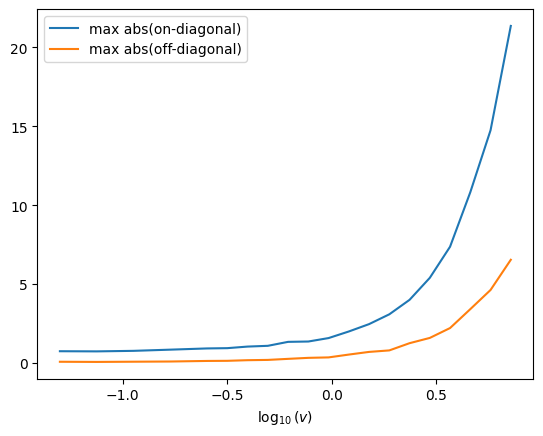

In [16]:
plt.plot(np.log10(stimulus_std), max_on_diagonal.mean(0), label="max abs(on-diagonal)")
plt.plot(np.log10(stimulus_std), max_off_diagonal.mean(0), label="max abs(off-diagonal)")
plt.xlabel(r"$\log_{10}(v)$")
plt.legend()

In [32]:
num_timesteps = 1000
transition_std = 1.0
obs_std = 1.0
init_std = 1.0

nv = 1.0

x_mean = np.array([1, 1])

x_cov = np.eye(2) * (nv ** 2)
x = np.random.multivariate_normal(x_mean, x_cov, size=(num_timesteps, ))

w, r = lds_generative(transition_std=transition_std, obs_std=obs_std, init_std=init_std, stimuli=x)
mu, Sigma = lds_filtering(r, x, init_std=init_std, obs_std=obs_std, transition_std=transition_std)

Text(0.5, 1.0, 'Filtered state (posterior mean)')

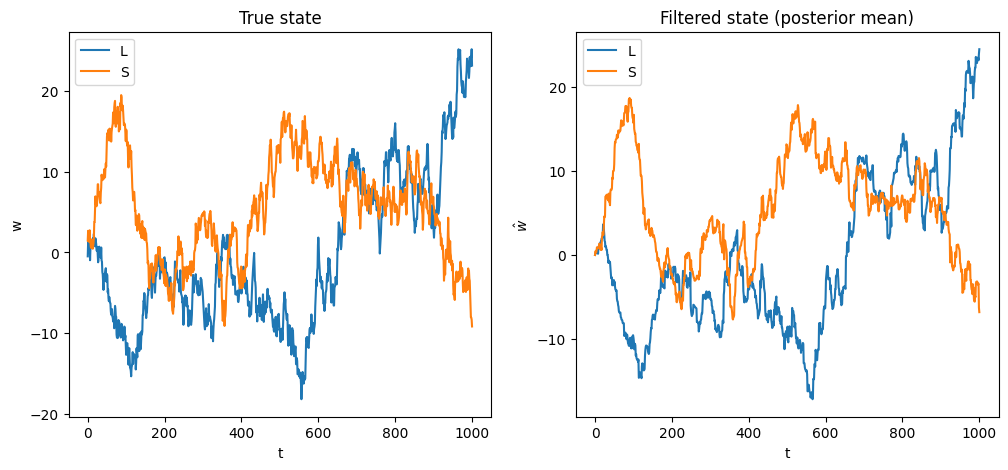

In [33]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].plot(np.array(w)[:, 0], label="L")
ax[0].plot(np.array(w)[:, 1], label="S")
ax[0].legend()
ax[0].set_ylabel("w")
ax[0].set_xlabel("t")
ax[0].set_title("True state")

ax[1].plot(np.array(mu)[:, 0], label="L")
ax[1].plot(np.array(mu)[:, 1], label="S")
ax[1].legend()
ax[1].set_ylabel(r"$\hat{w}$")
ax[1].set_xlabel("t")
ax[1].set_title("Filtered state (posterior mean)")

In [38]:
transition_std = 0.09
obs_std = 0.35
init_std = 0.09

x = np.concatenate([
    np.array([np.array([1., 1.]) for _ in range(20)]), 
    np.array([np.array([1., 0.]) for _ in range(20)])
], axis=0)

w, r = lds_generative(transition_std=transition_std, obs_std=obs_std, init_std=init_std, stimuli=x)

mu, Sigma = lds_filtering(r, x, init_std=init_std, obs_std=obs_std, transition_std=transition_std)

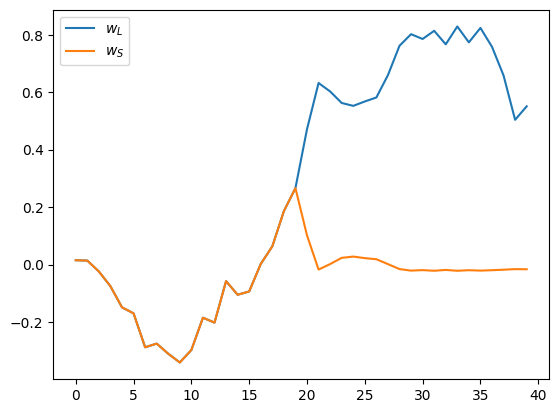

In [39]:
plt.plot(np.array(mu)[1:, 0], label=r"$w_{L}$")
plt.plot(np.array(mu)[1:, 1], label=r"$w_{S}$")
plt.legend()

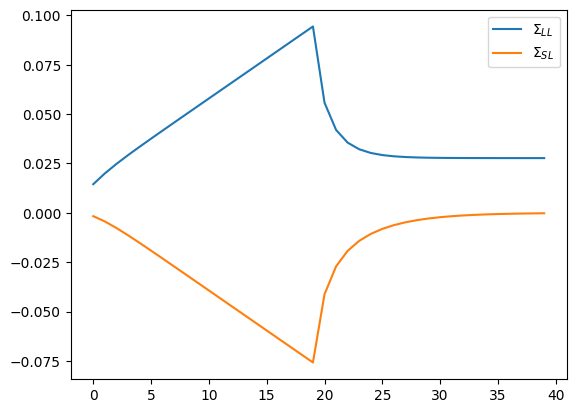

In [40]:
plt.plot(np.array(Sigma)[1:, 0, 0], label=r"$\Sigma_{LL}$")
plt.plot(np.array(Sigma)[1:, 1, 0], label=r"$\Sigma_{SL}$")
plt.legend()